In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path_to_csv = '/content/gdrive/My Drive/diabetes.csv'

1)
a)Add more Dense layers to the existing code and check how the accuracy changes

In [9]:
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load dataset from CSV
dataset = pd.read_csv('diabetes.csv', header=None).values

# Split the dataset into features (X) and target (Y)
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)

# Define the neural network model
my_first_nn = Sequential()
my_first_nn.add(Dense(20, input_dim=8, activation='relu'))  # Hidden layer 1
my_first_nn.add(Dense(16, activation='relu'))  # Hidden layer 2
my_first_nn.add(Dense(12, activation='relu'))  # Hidden layer 3
my_first_nn.add(Dense(8, activation='relu'))  # Hidden layer 4
my_first_nn.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0, verbose=0)

# Print model summary
print(my_first_nn.summary())

# Evaluate the model on the testing data
evaluation_result = my_first_nn.evaluate(X_test, Y_test)
print("Test Loss and Accuracy:", evaluation_result)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 12)                204       
                                                                 
 dense_3 (Dense)             (None, 8)                 104       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
6/6 [================

b) Change the data source to Breast Cancer dataset * available in the source code folder and make required
changes. Report accuracy of the model.

In [12]:
from google.colab import files
uploaded = files.upload()

Saving breastcancer.csv to breastcancer.csv


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the breast cancer dataset from the source code folder
data = pd.read_csv('breastcancer.csv')  # Adjust the filename if necessary

# Split the dataset into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Convert diagnosis labels to binary (0 for benign, 1 for malignant)
y = y.map({'B': 0, 'M': 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(model.summary())
print("Test Accuracy:", test_acc)



Epoch 1/50
15/15 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.6286
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 10/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 11/50
15/15 [==============================

c) Normalize the data before feeding the data to the model and check how the normalization change your accuracy (code given below).
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the breast cancer dataset from the source code folder
data = pd.read_csv('breastcancer.csv')  # Adjust the filename if necessary

# Split the dataset into features (X) and target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Convert diagnosis labels to binary (0 for benign, 1 for malignant)
y = y.map({'B': 0, 'M': 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_normalized, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_normalized, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


15/15 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 7/50
15/15 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6286
Epoch 8/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.6286
Epoch 11/50
15/15 [==============================] - 0s 2ms/

2)
a) Plot the loss and accuracy for both training data and validation data using the history object in the source coded.

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2386 - accuracy: 0.9284 - val_loss: 0.1248 - val_accuracy: 0.9611
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1033 - accuracy: 0.9687 - val_loss: 0.0980 - val_accuracy: 0.9701
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0721 - accuracy: 0.9778 - val_loss: 0.1040 - val_accuracy: 0.9671
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0556 - accuracy: 0.9823 - val_loss: 0.0876 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9863 - val_loss: 0.0988 - val_accuracy: 0.9722
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0808 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0900 - val_accuracy

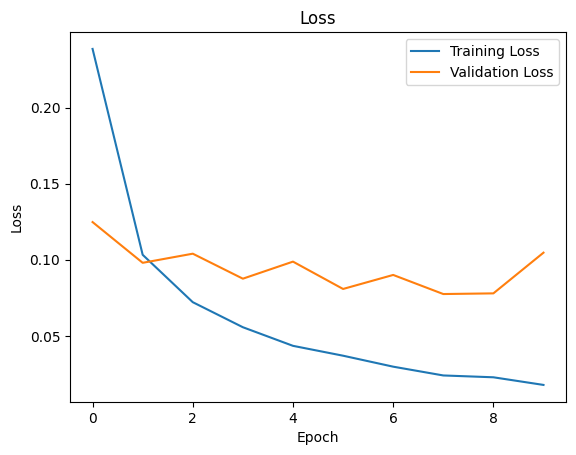

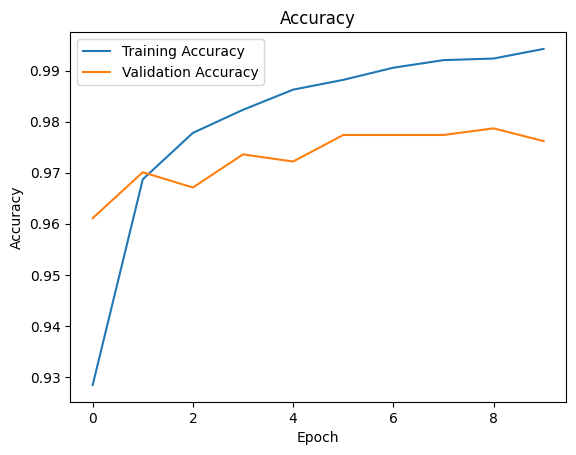

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the target labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


b) Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image.

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.3844 - accuracy: 0.8907 - val_loss: 0.1868 - val_accuracy: 0.9473
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1557 - accuracy: 0.9549 - val_loss: 0.1426 - val_accuracy: 0.9572
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1090 - accuracy: 0.9675 - val_loss: 0.1064 - val_accuracy: 0.9687
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0819 - accuracy: 0.9755 - val_loss: 0.1006 - val_accuracy: 0.9716
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0636 - accuracy: 0.9816 - val_loss: 0.0949 - val_accuracy: 0.9712
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.1063 - val_accuracy: 0.9677
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0420 - accuracy: 0.9872 - val_loss: 0.0975 - val_accuracy: 0.9716
Epo

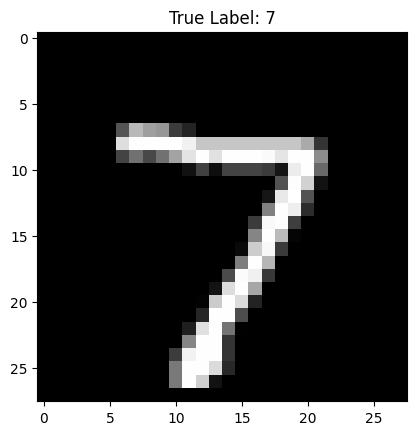

1/1 [==============================] - 0s 213ms/step
Predicted Label: 7


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data and normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Flatten the images from 28x28 to 784-dimensional vectors
X_train = X_train.reshape((len(X_train), 28 * 28))
X_test = X_test.reshape((len(X_test), 28 * 28))

# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Plot one of the images from the test data
image_idx = 0  # Change this index to see different images
plt.imshow(X_test[image_idx].reshape(28, 28), cmap='gray')
plt.title(f"True Label: {np.argmax(y_test[image_idx])}")
plt.show()

# Make predictions on the single image
single_image = X_test[image_idx].reshape(1, 784)  # Reshape to 1x784 for prediction
prediction = model.predict(single_image)
predicted_label = np.argmax(prediction)

print(f"Predicted Label: {predicted_label}")

c) We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to tanh or sigmoid and see what happens

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3395 - accuracy: 0.9102 - val_loss: 0.1670 - val_accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1327 - accuracy: 0.9612 - val_loss: 0.1150 - val_accuracy: 0.9680
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0872 - accuracy: 0.9738 - val_loss: 0.0933 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0630 - accuracy: 0.9814 - val_loss: 0.0793 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0933 - val_accuracy: 0.9711
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0357 - accuracy: 0.9896 - val_loss: 0.0739 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0275 - accuracy: 0.9918 - val_loss: 0.0710 - val_accurac

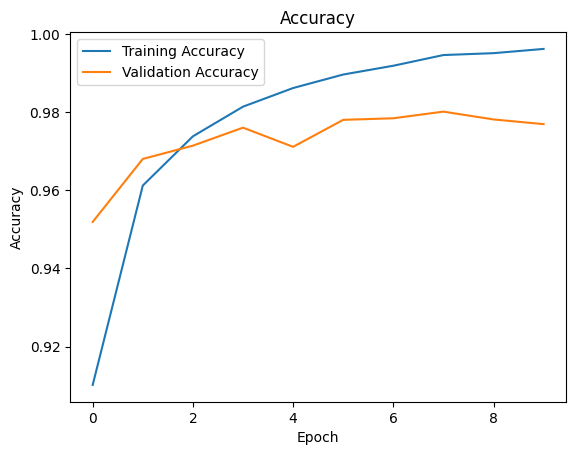

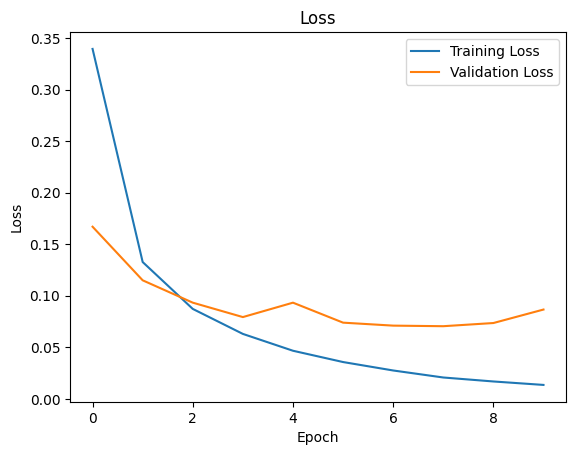

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='tanh'),  # Use tanh activation function
    Dense(64, activation='sigmoid'),  # Use sigmoid activation function
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


d) Run the same code without scaling the images and check the performance?

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6162 - accuracy: 0.8307 - val_loss: 0.4405 - val_accuracy: 0.8664
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4192 - accuracy: 0.8701 - val_loss: 0.4070 - val_accuracy: 0.8716
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3743 - accuracy: 0.8834 - val_loss: 0.3711 - val_accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3534 - accuracy: 0.8893 - val_loss: 0.3483 - val_accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3273 - accuracy: 0.8976 - val_loss: 0.2865 - val_accuracy: 0.9131
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2914 - accuracy: 0.9104 - val_loss: 0.2655 - val_accuracy: 0.9149
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2888 - accuracy: 0.9100 - val_loss: 0.2932 - val_accuracy

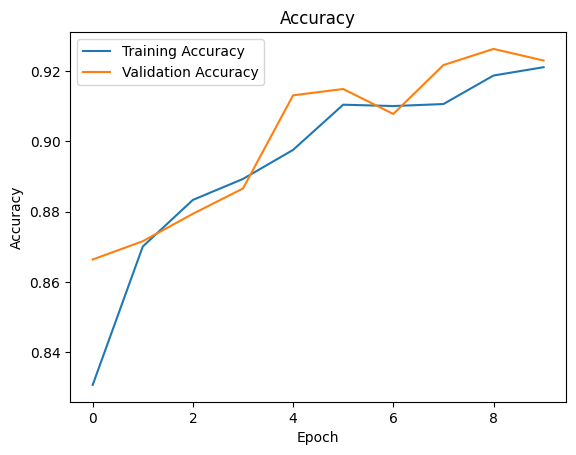

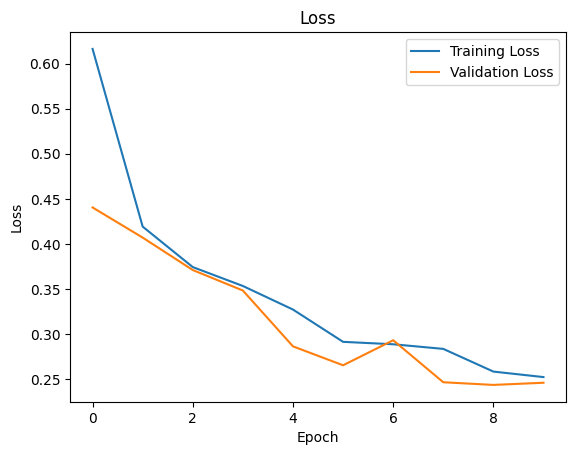

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='tanh'),
    Dense(64, activation='sigmoid'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
